<a href="https://colab.research.google.com/github/dntrply/network_model/blob/main/contact_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import datetime
from geopy import distance

In [3]:
# Upload the given file to google drive.
# Mount the Google Drive 
df = pd.read_csv('/content/drive/MyDrive/manning/liveProjects/ Federated Learning Over Networks for Pandemics series/build-network-models-for-pandemics/PeopleLocations.csv', sep=';')

In [4]:
df.describe

<bound method NDFrame.describe of             ID        Lat        Lon        Date      Time Covid19
0      Person1  60.185389  25.009688  09-06-2021  13:52:09       n
1      Person2  60.185387  25.009679  09-06-2021  13:52:09       n
2      Person3  60.185390  25.009696  09-06-2021  13:52:09       n
3      Person4  60.185389  25.009690  09-06-2021  13:52:09       y
4      Person5  60.185385  25.009672  09-06-2021  13:52:09       n
..         ...        ...        ...         ...       ...     ...
295  Person296  60.309190  25.036466  09-06-2021  13:52:09       n
296  Person297  60.309189  25.036461  09-06-2021  13:52:09       y
297  Person298  60.309187  25.036451  09-06-2021  13:52:09       y
298  Person299  60.309188  25.036455  09-06-2021  13:52:09       y
299  Person300  60.309189  25.036461  09-06-2021  13:52:09       n

[300 rows x 6 columns]>

In [5]:
# Create a non-dorectional graph
G = nx.Graph()

In [6]:
len(df)

300

In [7]:
# Need to combine the date and time to a datetime object
# from https://www.kdnuggets.com/2019/06/how-use-datetime.html
#date_and_time = datetime.datetime.combine(datetime.date(df['Date'][0]), datetime.time(df['Time'][0]))

# from stackoverflow [Converting string into datetime](https://stackoverflow.com/questions/466345/converting-string-into-datetime) and the actual dcumentation [strftime() and strptime() Behavior](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

In [8]:
# Working at the dataframe level may be advantageous - but we could also do it as a for loop as follows:
# for every node up to the midpoint:
#    for every node starting from the next node up to all nodes
#        calculate the distance between the two people
#         if this distance is within 2m (< 2m), add an edge between these two nodes
# It may be something like this
total_num = len(df)
half_total_num = total_num // 2 + ((total_num % 2) > 0)


In [9]:
# Add all persons as nodes
# Set up each of the node attributes - namely name, coords, timestamp and Rate
for idx in range(0, total_num):
  date_and_time = datetime.datetime.strptime(f"{df['Date'][idx]} {df['Time'][idx]}", '%m-%d-%Y %H:%M:%S')
  G.add_node(idx,
             name=df['ID'][idx],
             coords=[df['Lat'][idx], df['Lon'][idx]],
             timestamp=date_and_time,
             Rate=0 if df['Covid19'][idx]=='n' else 1)


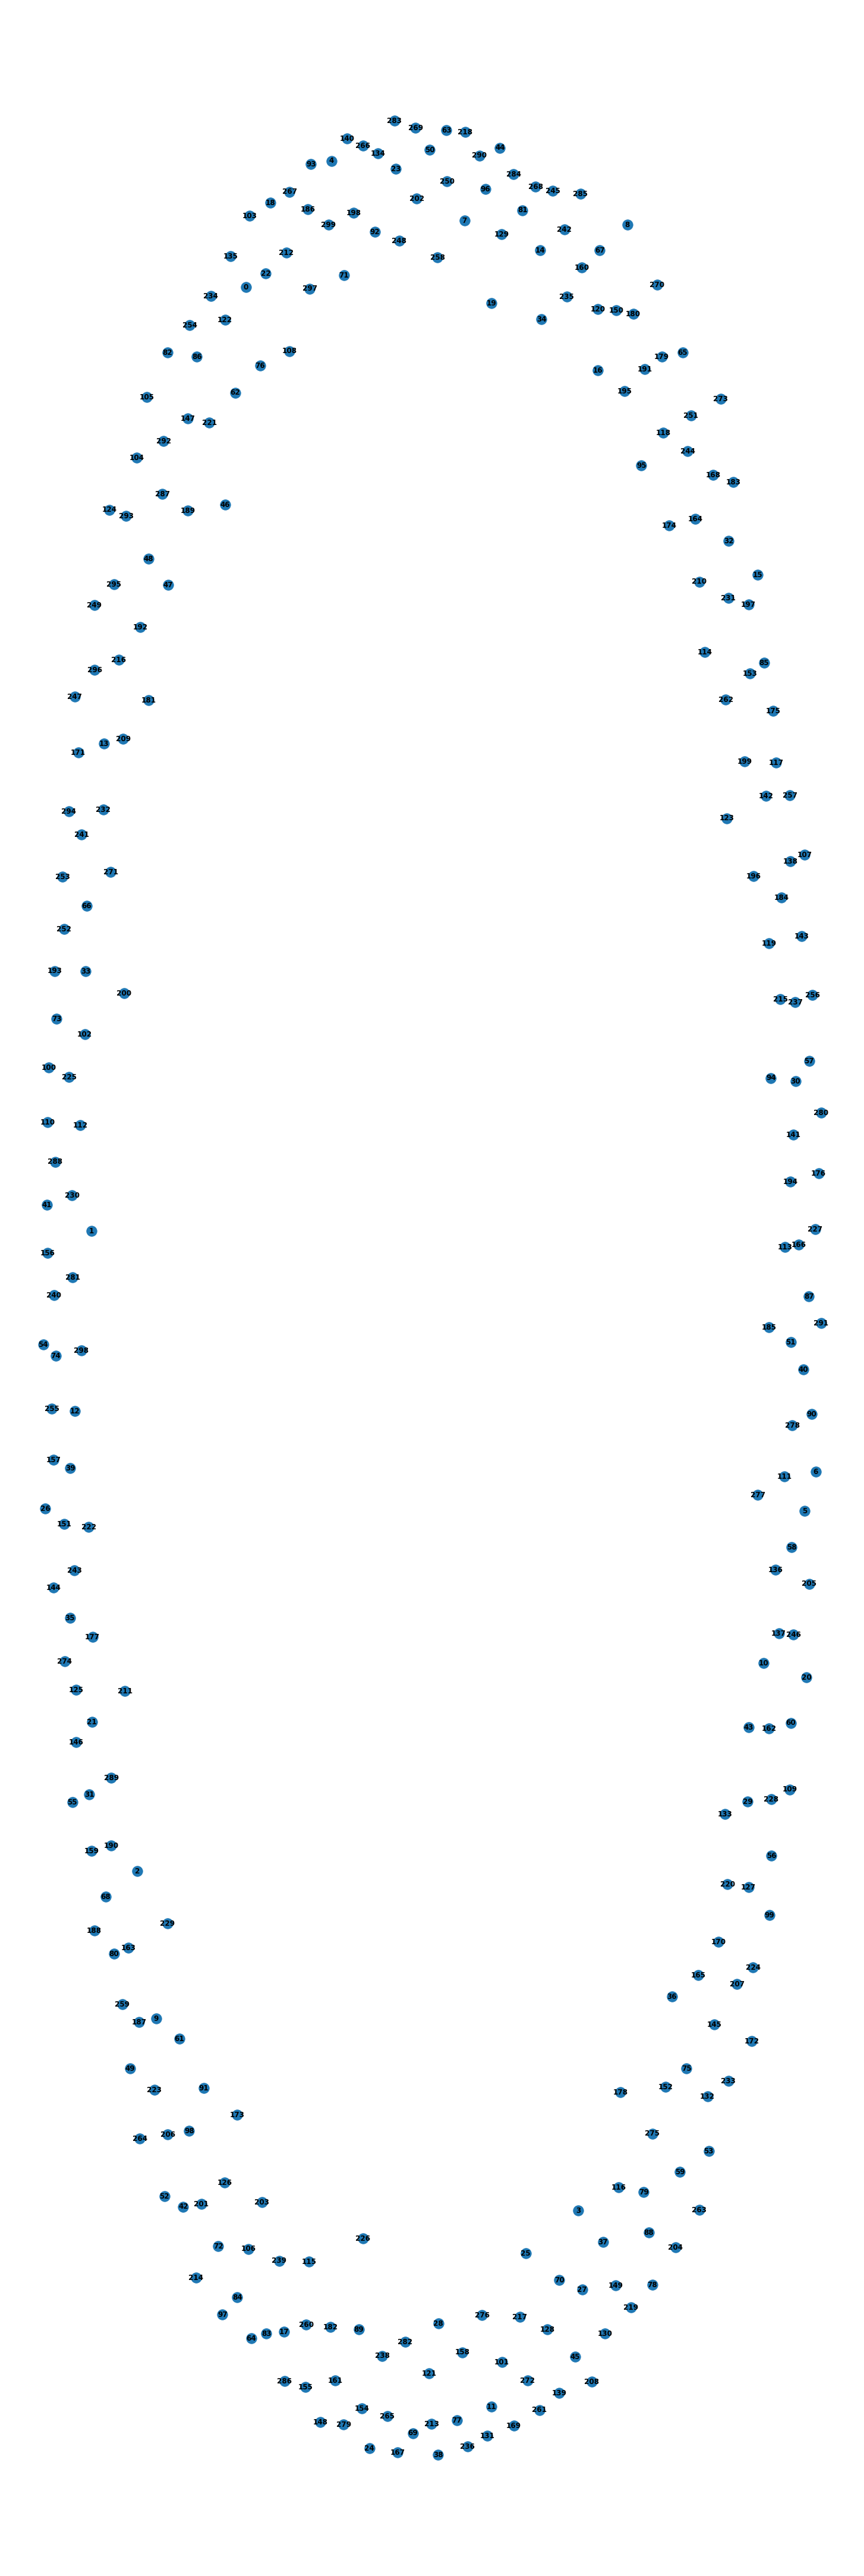

In [10]:
# Plot how the nodes look like
plt.figure(figsize=(20,60)) 
nx.draw(G, with_labels=True, font_weight='bold')

In [11]:
# All nodes ar eadded. Now add the edges
for idx in range(0, half_total_num):
  for jdx in range(idx+1, total_num):
     # Calculate distance

     # get each person coords
     coord1 = G.nodes[idx]['coords']
     coord2 = G.nodes[jdx]['coords']

     # Get the distance betwen the coordinates
     person_distance = distance.geodesic(coord1, coord2).m
     distance.geodesic(G.nodes[0]['coords'], G.nodes[1]['coords']).m

     # Add edge if the distance is within 2m
     if (person_distance < 2.0):
       G.add_edge(idx, jdx)

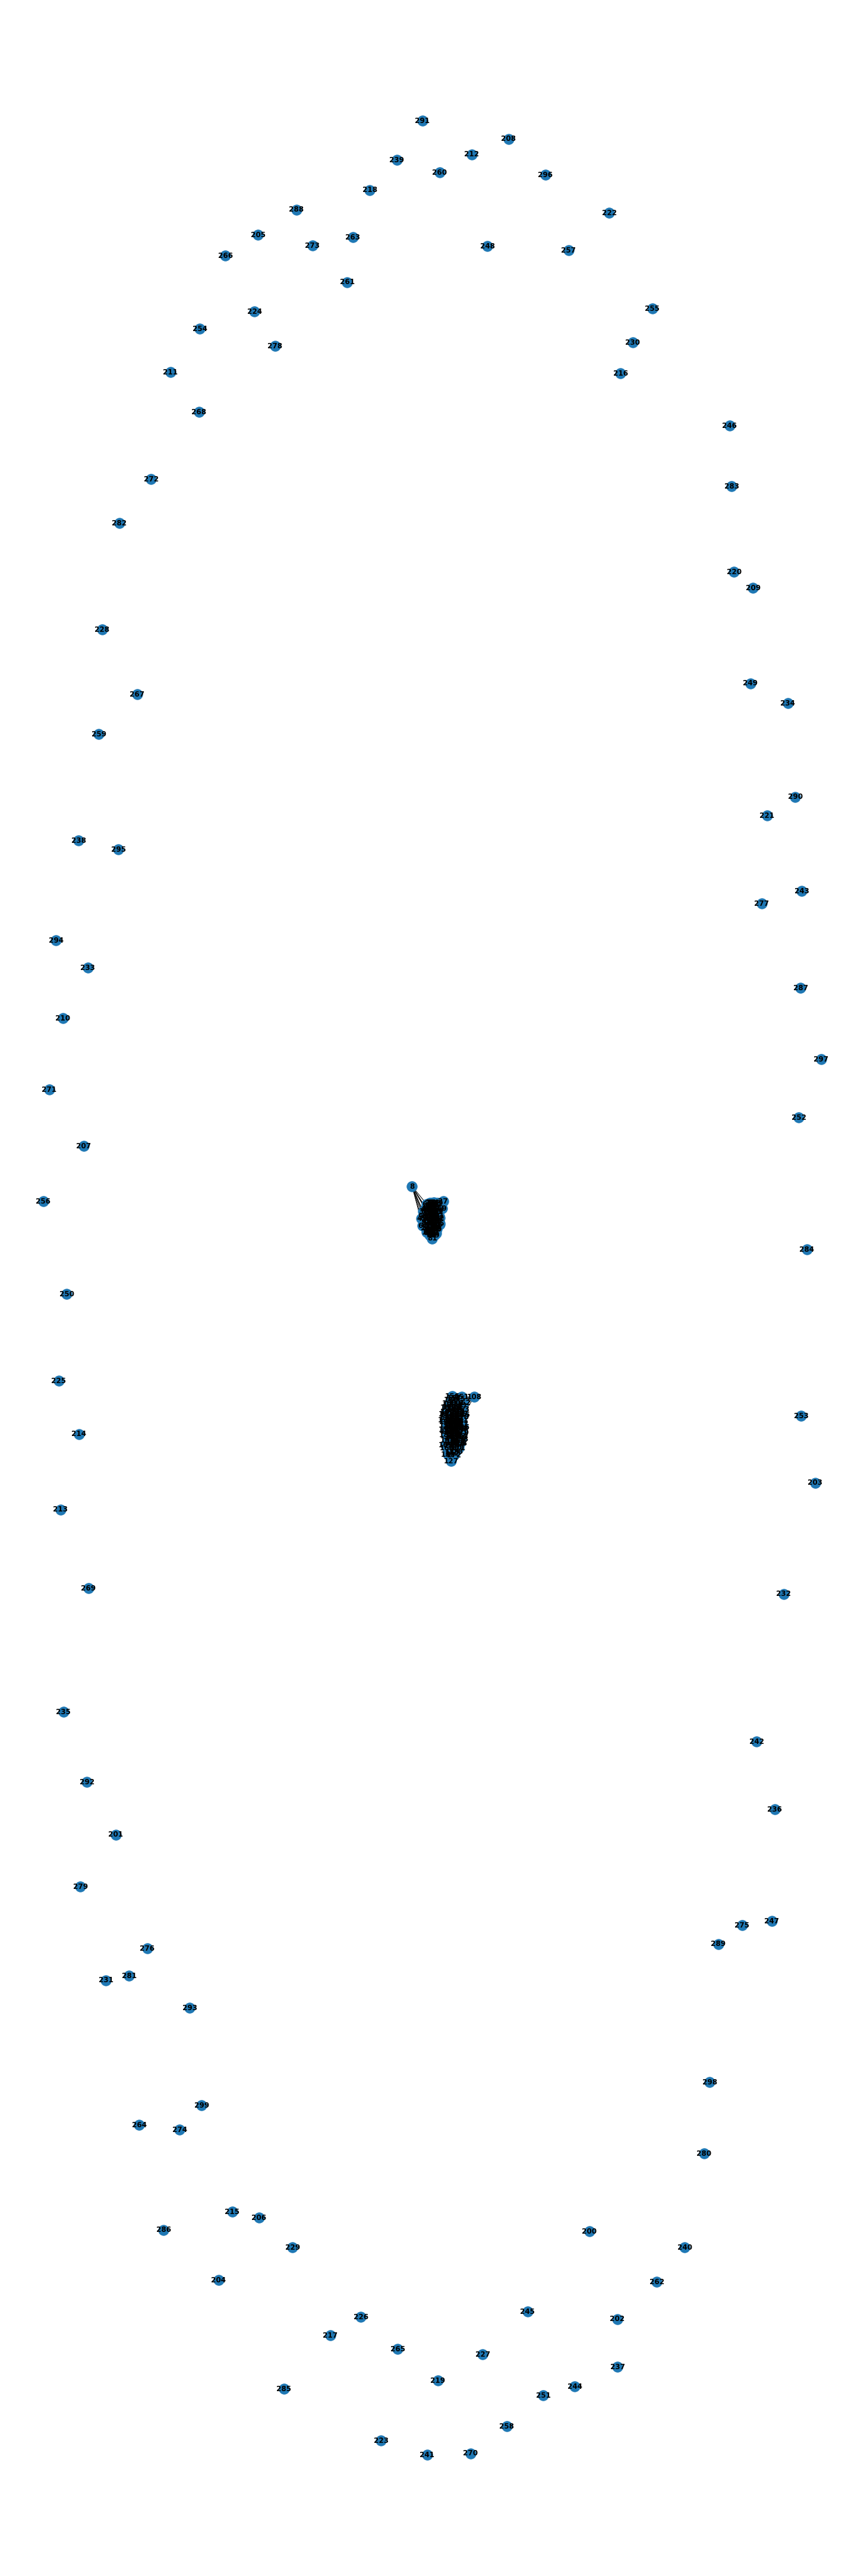

In [12]:
plt.figure(figsize=(20,60))
nx.draw(G, with_labels=True, font_weight='bold')